In [8]:
from embedding_evaluation_framework import EmbeddingData, eval_n2v
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
ps = [0.25,0.75,1,1.25,1.75]

In [10]:
inits = 20
splits = 100

In [11]:
val_out = 'eval/n2v.csv'

In [12]:
if os.path.exists(val_out):
    df_n2v = pd.read_csv(val_out)
else:
    df_n2v = pd.DataFrame(columns='splits inits p q val_acc val_avg val_std'.split())
# df_n2v

In [13]:
def contains(df_val,p,q):
    return ((df_val['p']==p) & (df_val['q']==q)).any()

In [14]:
for p in ps:
    for q in ps:
        if contains(df_n2v,p,q):
            print('already calculated!')
            continue
        print(f'evaluating p={p},q={q}')
        vals = []
        tests = []
        for init in range(inits):
            print(f' init {init}')
            emb = EmbeddingData(f'/tmp/n2vUndp{p}q{q}EmbCoraInit{init}','cora',f'node2vec_rw_{p:0.2f}_{q:0.2f}',directed=False,initialization=f'node2vec/{init}')
            val = eval_n2v(emb[0],num_splits=splits)
            vals = vals + val
#             tests = tests + test
        df_n2v = df_n2v.append({'p':p, 'q':q,
                                'val_acc':vals, 'val_avg':np.mean(vals), 'val_std':np.std(vals),
#                                 'test_acc':tests, 'test_avg':np.mean(tests), 'test_std':np.std(tests)
                               },ignore_index=True)
        df_n2v.to_csv(val_out,index=False)

already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!
already calculated!


In [16]:
df_n2v

,splits,inits,p,q,val_acc,val_avg,val_std
0,NaN,NaN,0.25,0.25,"[0.719047619047619, 0.6523809523809524, 0.7238...",0.723119,0.034130
1,NaN,NaN,0.25,0.75,"[0.7095238095238096, 0.7, 0.7380952380952381, ...",0.719840,0.034346
2,NaN,NaN,0.25,1.25,"[0.6952380952380952, 0.6476190476190476, 0.723...",0.716671,0.034457
3,NaN,NaN,0.25,1.75,"[0.6761904761904762, 0.680952380952381, 0.7238...",0.716631,0.035283
4,NaN,NaN,0.75,0.25,"[0.719047619047619, 0.6428571428571429, 0.7476...",0.724264,0.036025
5,NaN,NaN,0.75,0.75,"[0.7380952380952381, 0.6714285714285714, 0.733...",0.729755,0.034183
6,NaN,NaN,0.75,1.25,"[0.6904761904761905, 0.680952380952381, 0.7095...",0.729162,0.034468
7,NaN,NaN,0.75,1.75,"[0.7428571428571429, 0.680952380952381, 0.7380...",0.723233,0.034018
8,NaN,NaN,1.25,0.25,"[0.7, 0.6571428571428571, 0.7333333333333333, ...",0.724940,0.034820
9,NaN,NaN,1.25,0.75,"[0.719047619047619, 0.6857142857142857, 0.7428...",0.724129,0.034853


In [28]:
for f in os.listdir('eval'):
    if f.startswith('gat') and f.endswith('csv'):
        print(f)

gat_val_48_0.005.csv
gat_val_96.csv
gat_val_24.csv
gat_val_96_0.01.csv
gat_val.csv
gat_val_48.csv
gat_val_96_0.005.csv
gat_val_12_0.01.csv
gat_val_24_0.005.csv
gat_val_24_0.01.csv


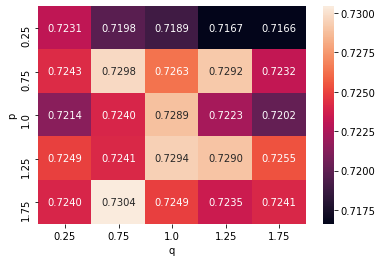

In [20]:
plt.figure()
pvt = df_n2v.pivot("p","q","val_avg")
sns.heatmap(pvt, annot=True, fmt=".4f")

/home/hhussain/anaconda3/envs/nips2/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


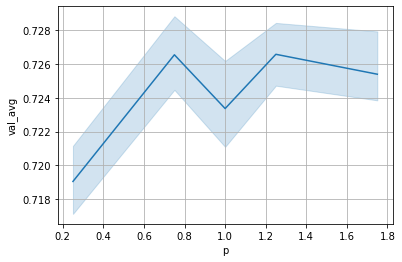

In [18]:
plt.figure()
plt.grid()
sns.lineplot(data=df_n2v,x='p',y='val_avg')

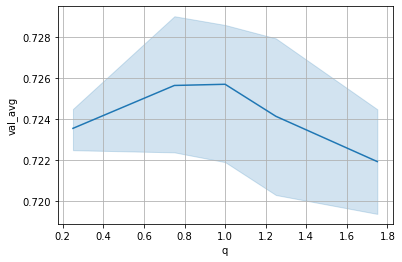

In [19]:
plt.figure()
plt.grid()
sns.lineplot(data=df_n2v,x='q',y='val_avg')